In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.offline as pyo
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from mpldatacursor import datacursor

In [153]:
#Load in datasets and check column names
housing_data_1b = pd.read_csv('City_MedianRentalPrice_1Bedroom.csv')
housing_data_2b = pd.read_csv('City_MedianRentalPrice_2Bedroom.csv')
housing_data_3b = pd.read_csv('City_MedianRentalPrice_3Bedroom.csv')
housing_data_1b.columns

Index(['Unnamed: 0', 'RegionName', 'State', 'Metro', 'CountyName', 'SizeRank',
       '2010-02', '2010-03', '2010-04', '2010-05',
       ...
       '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
       '2019-09', '2019-10', '2019-11', '2019-12'],
      dtype='object', length=125)

In [154]:
income_data = pd.read_csv('2015 Median Income by County.csv')
income_data[['County', 'Median household income','State Code','State']]
income_data['CountyState'] = income_data['County'] + income_data['State Code']
income_data

,County-State,County,Population,Median household income,State Code,State,CountyState
0,"Autauga County, Alabama",Autauga County,55221,51281.0,AL,Alabama,Autauga CountyAL
1,"Baldwin County, Alabama",Baldwin County,195121,50254.0,AL,Alabama,Baldwin CountyAL
2,"Barbour County, Alabama",Barbour County,26932,32964.0,AL,Alabama,Barbour CountyAL
3,"Bibb County, Alabama",Bibb County,22604,38678.0,AL,Alabama,Bibb CountyAL
4,"Blount County, Alabama",Blount County,57710,45813.0,AL,Alabama,Blount CountyAL
...,...,...,...,...,...,...,...
3215,"Vega Baja Municipio, Puerto Rico",Vega Baja Municipio,56858,16948.0,WY,Wyoming,Vega Baja MunicipioWY
3216,"Vieques Municipio, Puerto Rico",Vieques Municipio,9130,18104.0,WY,Wyoming,Vieques MunicipioWY
3217,"Villalba Municipio, Puerto Rico",Villalba Municipio,24685,17818.0,WY,Wyoming,Villalba MunicipioWY
3218,"Yabucoa Municipio, Puerto Rico",Yabucoa Municipio,36279,15627.0,WY,Wyoming,Yabucoa MunicipioWY


In [155]:
#Select the necessary columns needed
housing_1b_2019 = housing_data_1b[['RegionName', 'CountyName', 'State','2019-01','2019-02','2019-03','2019-04','2019-05',
      '2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12']]

housing_2b_2019 = housing_data_2b[['RegionName', 'CountyName', 'State','2019-01','2019-02','2019-03','2019-04','2019-05',
      '2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12']]

housing_3b_2019 = housing_data_3b[['RegionName', 'CountyName', 'State','2019-01','2019-02','2019-03','2019-04','2019-05',
      '2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12']]
housing_1b_2019.head(50)

,RegionName,CountyName,State,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,New York,Queens County,NY,2300.0,2300.0,2350.0,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0
1,Los Angeles,Los Angeles County,CA,2362.5,2345.0,2360.0,2395.0,2370.0,2395.0,2395.0,2400.0,2425.0,2350.0,2330.0,2340.0
2,Houston,Harris County,TX,1250.0,1250.0,1265.0,1270.0,1269.0,1286.0,1275.0,1275.0,1270.0,1264.0,1245.0,1249.0
3,Chicago,Cook County,IL,1670.0,1675.0,1695.0,1650.0,1650.0,1634.0,1600.0,1582.0,1595.0,1542.0,1550.0,1550.0
4,San Antonio,Bexar County,TX,952.0,983.0,985.0,981.0,985.0,999.0,1000.0,1000.0,991.0,985.0,974.5,967.5
5,Philadelphia,Philadelphia County,PA,1550.0,1550.0,1550.0,1525.0,1496.0,1500.0,1507.5,1554.0,1495.0,1500.0,1500.0,1470.0
6,Phoenix,Maricopa County,AZ,1033.0,1059.0,1055.0,1115.5,1172.5,1161.0,1129.0,1102.5,1122.0,1100.0,1110.0,1170.0
7,Las Vegas,Clark County,NV,1004.0,1002.0,1002.5,1010.0,1008.0,1026.0,1010.0,1040.0,1029.5,1030.0,1025.0,1028.0
8,San Diego,San Diego County,CA,2020.0,2020.0,1995.0,1990.0,2000.0,2050.0,2100.0,2100.0,2100.0,2049.5,1995.0,2000.0
9,Dallas,Dallas County,TX,1360.0,1398.0,1376.0,1375.0,1375.0,1360.0,1355.0,1330.0,1335.0,1340.0,1330.0,1340.0


In [156]:
#Melt the dataset to have all the monthly averages into one column.
housing_1b_2019_melted = housing_1b_2019.melt(['RegionName','CountyName','State'], ['2019-01','2019-02','2019-03','2019-04','2019-05',
      '2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12'])
housing_1b_2019_melted.columns = ['City','County','State Code','Rent Year','1B_Price_2019']

housing_2b_2019_melted = housing_2b_2019.melt(['RegionName','CountyName','State'], ['2019-01','2019-02','2019-03','2019-04','2019-05',
      '2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12'])
housing_2b_2019_melted.columns = ['City','County','State Code','Rent Year','2B_Price_2019']

housing_3b_2019_melted = housing_3b_2019.melt(['RegionName','CountyName','State'], ['2019-01','2019-02','2019-03','2019-04','2019-05',
      '2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12'])
housing_3b_2019_melted.columns = ['City','County','State Code','Rent Year','3B_Price_2019']

housing_3b_2019_melted

,City,County,State Code,Rent Year,3B_Price_2019
0,New York,Queens County,NY,2019-01,2600.0
1,Los Angeles,Los Angeles County,CA,2019-01,3600.0
2,Houston,Harris County,TX,2019-01,1595.0
3,Chicago,Cook County,IL,2019-01,1900.0
4,San Antonio,Bexar County,TX,2019-01,1450.0
...,...,...,...,...,...
11875,Siesta Key,Sarasota County,FL,2019-12,5100.0
11876,Glasgow Village,Saint Louis County,MO,2019-12,817.5
11877,Bridgehampton,Suffolk County,NY,2019-12,30000.0
11878,Montauk,Suffolk County,NY,2019-12,21333.0


In [157]:
housing_1b_2019_melted['CountyState'] = housing_1b_2019_melted['County'] + housing_1b_2019_melted['State Code']
housing_2b_2019_melted['CountyState'] = housing_2b_2019_melted['County'] + housing_2b_2019_melted['State Code']
housing_3b_2019_melted['CountyState'] = housing_3b_2019_melted['County'] + housing_3b_2019_melted['State Code']
housing_3b_2019_melted

,City,County,State Code,Rent Year,3B_Price_2019,CountyState
0,New York,Queens County,NY,2019-01,2600.0,Queens CountyNY
1,Los Angeles,Los Angeles County,CA,2019-01,3600.0,Los Angeles CountyCA
2,Houston,Harris County,TX,2019-01,1595.0,Harris CountyTX
3,Chicago,Cook County,IL,2019-01,1900.0,Cook CountyIL
4,San Antonio,Bexar County,TX,2019-01,1450.0,Bexar CountyTX
...,...,...,...,...,...,...
11875,Siesta Key,Sarasota County,FL,2019-12,5100.0,Sarasota CountyFL
11876,Glasgow Village,Saint Louis County,MO,2019-12,817.5,Saint Louis CountyMO
11877,Bridgehampton,Suffolk County,NY,2019-12,30000.0,Suffolk CountyNY
11878,Montauk,Suffolk County,NY,2019-12,21333.0,Suffolk CountyNY


In [158]:
#Group all of the monthly prices into 1 value for the year.
rent_1b_2019 = housing_1b_2019_melted.groupby('CountyState', as_index=False).mean()
rent_1b_2019['State Code'] = rent_1b_2019['CountyState'].str.slice(-2)
rent_1b_2019['County'] = rent_1b_2019['CountyState'].str.slice(0,-2)
rent_1b_2019.dropna(inplace=True)
rent_1b_2019

rent_2b_2019 = housing_2b_2019_melted.groupby('CountyState', as_index=False).mean()
rent_2b_2019['State Code'] = rent_2b_2019['CountyState'].str.slice(-2)
rent_2b_2019['County'] = rent_2b_2019['CountyState'].str.slice(0,-2)
rent_2b_2019.dropna(inplace=True)

rent_3b_2019 = housing_3b_2019_melted.groupby('CountyState', as_index=False).mean()
rent_3b_2019['State Code'] = rent_3b_2019['CountyState'].str.slice(-2)
rent_3b_2019['County'] = rent_3b_2019['CountyState'].str.slice(0,-2)
rent_3b_2019.dropna(inplace=True)

rent_3b_2019

,CountyState,3B_Price_2019,State Code,County
0,Ada CountyID,1511.104167,ID,Ada County
1,Adams CountyCO,2030.666667,CO,Adams County
2,Alachua CountyFL,1465.666667,FL,Alachua County
3,Alameda CountyCA,3317.500000,CA,Alameda County
4,Albany CountyNY,1308.125000,NY,Albany County
...,...,...,...,...
407,Yolo CountyCA,2484.791667,CA,Yolo County
408,York CountyPA,1214.895833,PA,York County
409,York CountySC,1451.958333,SC,York County
410,York CountyVA,1471.041667,VA,York County


In [159]:
housing_1b_2015_melted = housing_data_1b.melt(['RegionName','CountyName','State'], ['2015-01','2015-02','2015-03','2015-04','2015-05',
      '2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12'])
housing_1b_2015_melted.columns = ['City','County','State Code','Rent Year','1B_Price_2015']
housing_1b_2015_melted['CountyState'] = housing_1b_2015_melted['County'] + housing_1b_2015_melted['State Code']
rent_1b_2015 = housing_1b_2015_melted.groupby('CountyState', as_index=False).mean()
rent_1b_2015['State Code'] = rent_1b_2015['CountyState'].str.slice(-2)
rent_1b_2015['County'] = rent_1b_2015['CountyState'].str.slice(0,-2)

housing_2b_2015_melted = housing_data_2b.melt(['RegionName','CountyName','State'], ['2015-01','2015-02','2015-03','2015-04','2015-05',
      '2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12'])
housing_2b_2015_melted.columns = ['City','County','State Code','Rent Year','2B_Price_2015']
housing_2b_2015_melted['CountyState'] = housing_2b_2015_melted['County'] + housing_2b_2015_melted['State Code']
rent_2b_2015 = housing_2b_2015_melted.groupby('CountyState', as_index=False).mean()
rent_2b_2015['State Code'] = rent_2b_2015['CountyState'].str.slice(-2)
rent_2b_2015['County'] = rent_2b_2015['CountyState'].str.slice(0,-2)

housing_3b_2015_melted = housing_data_3b.melt(['RegionName','CountyName','State'], ['2015-01','2015-02','2015-03','2015-04','2015-05',
      '2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12'])
housing_3b_2015_melted.columns = ['City','County','State Code','Rent Year','3B_Price_2015']
housing_3b_2015_melted['CountyState'] = housing_3b_2015_melted['County'] + housing_3b_2015_melted['State Code']
rent_3b_2015 = housing_3b_2015_melted.groupby('CountyState', as_index=False).mean()
rent_3b_2015['State Code'] = rent_3b_2015['CountyState'].str.slice(-2)
rent_3b_2015['County'] = rent_3b_2015['CountyState'].str.slice(0,-2)

rent_1b_2015

,CountyState,1B_Price_2015,State Code,County
0,Ada CountyID,635.416667,ID,Ada County
1,Adams CountyCO,1115.269231,CO,Adams County
2,Alachua CountyFL,NaN,FL,Alachua County
3,Alameda CountyCA,2134.476190,CA,Alameda County
4,Albany CountyNY,NaN,NY,Albany County
...,...,...,...,...
324,Yakima CountyWA,NaN,WA,Yakima County
325,Yellowstone CountyMT,579.375000,MT,Yellowstone County
326,Yolo CountyCA,NaN,CA,Yolo County
327,York CountyPA,NaN,PA,York County


In [191]:
price_ols_1b = ols('Q("1B_Price_2015") ~ Q("1B_Price_2019")', merge_1b).fit()
price_ols_1b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("1B_Price_2015")   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     5603.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          7.88e-208
Time:                        16:03:10   Log-Likelihood:                -1970.7
No. Observations:                 329   AIC:                             3945.
Df Residuals:                     327   BIC:                             3953.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.6513     14.537      0.870      0.385     -15.946      41.248
Q("1B_Price_2019")     0.8958      0.012     74.850      0.000       0.872       0.919
==============================================================================
Omnibus:                       83.029   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.645
Skew:                          -1.062   Prob(JB):                     2.33e-65
Kurtosis:                       7.147   Cond. No.                     3.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
price_ols_2b = ols('Q("2B_Price_2015") ~ Q("2B_Price_2019")', merge_2b).fit()
price_ols_2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("2B_Price_2015")   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     8266.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          5.86e-306
Time:                        15:39:33   Log-Likelihood:                -2992.5
No. Observations:                 485   AIC:                             5989.
Df Residuals:                     483   BIC:                             5997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -12.2434     13.290     -0.921      0.357     -38.357      13.870
Q("2B_Price_2019")     0.8913      0.010     90.915      0.000       0.872       0.911
==============================================================================
Omnibus:                      111.725   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2834.941
Skew:                          -0.260   Prob(JB):                         0.00
Kurtosis:                      14.833   Cond. No.                     3.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
price_ols_3b = ols('Q("3B_Price_2015") ~ Q("3B_Price_2019")', merge_3b).fit()
price_ols_3b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("3B_Price_2015")   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     6025.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          7.42e-247
Time:                        15:39:33   Log-Likelihood:                -2625.3
No. Observations:                 411   AIC:                             5255.
Df Residuals:                     409   BIC:                             5263.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -12.6347     19.136     -0.660      0.509     -50.252      24.982
Q("3B_Price_2019")     0.8912      0.011     77.622      0.000       0.869       0.914
==============================================================================
Omnibus:                      117.345   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3433.868
Skew:                          -0.509   Prob(JB):                         0.00
Kurtosis:                      17.124   Cond. No.                     4.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
merge_1b = pd.merge(rent_1b_2019, rent_1b_2015)
merge_2b = pd.merge(rent_2b_2019, rent_2b_2015)
merge_3b = pd.merge(rent_3b_2019, rent_3b_2015)

merge_1b['1B_Price_2015'].fillna(merge_1b['1B_Price_2019'] * 0.8958, inplace=True)
merge_2b['2B_Price_2015'].fillna(merge_2b['2B_Price_2019'] * 0.8913, inplace=True)
merge_3b['3B_Price_2015'].fillna(merge_3b['3B_Price_2019'] * 0.8912, inplace=True)
merge_3b.drop([364], inplace=True)
merge_3b.sort_values('3B_Price_2019')

merge_1b

,CountyState,1B_Price_2019,State Code,County,1B_Price_2015
0,Ada CountyID,1041.500000,ID,Ada County,635.416667
1,Adams CountyCO,1336.638889,CO,Adams County,1115.269231
2,Alachua CountyFL,1033.125000,FL,Alachua County,925.473375
3,Alameda CountyCA,2358.350000,CA,Alameda County,2134.476190
4,Albany CountyNY,1171.875000,NY,Albany County,1049.765625
...,...,...,...,...,...
324,Yakima CountyWA,640.833333,WA,Yakima County,574.058500
325,Yellowstone CountyMT,692.500000,MT,Yellowstone County,579.375000
326,Yolo CountyCA,1471.625000,CA,Yolo County,1318.281675
327,York CountyPA,710.500000,PA,York County,636.465900


In [164]:
merged_data_1 = pd.merge(income_data, merge_1b, on='CountyState')
merged_data_1.drop(['County_y','State Code_y', '1B_Price_2019'], axis=1, inplace=True)
merged_data_1.columns = ['County-State','County','Population','Median_household_income',
                       'State Code','State', 'CountyState','1B_Price']

merged_data_2 = pd.merge(income_data, merge_2b, on='CountyState')
merged_data_2.drop(['County_y','State Code_y', '2B_Price_2019'], axis=1, inplace=True)
merged_data_2.columns = ['County-State','County','Population','Median_household_income',
                       'State Code','State', 'CountyState','2B_Price']

merged_data_3 = pd.merge(income_data, merge_3b, on='CountyState')
merged_data_3.drop(['County_y','State Code_y', '3B_Price_2019'], axis=1, inplace=True)
merged_data_3.columns = ['County-State','County','Population','Median_household_income',
                       'State Code','State', 'CountyState','3B_Price']


merged_data_1['1B_Price'] = 12*merged_data_1['1B_Price']
merged_data_1['1B_Income-Price_Difference'] = merged_data_1['Median_household_income'] - merged_data_1['1B_Price']
merged_data_1

merged_data_2['2B_Price'] = 12 * merged_data_2['2B_Price']
merged_data_2['2B_Income-Price_Difference'] = merged_data_2['Median_household_income'] - merged_data_2['2B_Price']
merged_data_2

merged_data_3['3B_Price'] = 12 * merged_data_3['3B_Price']
merged_data_3['3B_Income-Price_Difference'] = merged_data_3['Median_household_income'] - merged_data_3['3B_Price']
merged_data_3

,County-State,County,Population,Median_household_income,State Code,State,CountyState,3B_Price,3B_Income-Price_Difference
0,"Baldwin County, Alabama",Baldwin County,195121,50254.0,AL,Alabama,Baldwin CountyAL,15444.1892,34809.8108
1,"Jefferson County, Alabama",Jefferson County,659026,45610.0,AL,Alabama,Jefferson CountyAL,9290.0000,36320.0000
2,"Lee County, Alabama",Lee County,150982,44570.0,AL,Alabama,Lee CountyAL,13819.9545,30750.0455
3,"Mobile County, Alabama",Mobile County,414251,43809.0,AL,Alabama,Mobile CountyAL,10928.0000,32881.0000
4,"Montgomery County, Alabama",Montgomery County,228138,44369.0,AL,Alabama,Montgomery CountyAL,10621.5000,33747.5000
...,...,...,...,...,...,...,...,...,...
379,"Dane County, Wisconsin",Dane County,510198,62865.0,WI,Wisconsin,Dane CountyWI,18850.0000,44015.0000
380,"Kenosha County, Wisconsin",Kenosha County,167738,54918.0,WI,Wisconsin,Kenosha CountyWI,13331.7435,41586.2565
381,"Milwaukee County, Wisconsin",Milwaukee County,955939,43873.0,WI,Wisconsin,Milwaukee CountyWI,10994.0000,32879.0000
382,"Winnebago County, Wisconsin",Winnebago County,169004,52018.0,WI,Wisconsin,Winnebago CountyWI,10371.1245,41646.8755


In [166]:
merged_df = pd.merge(merged_data_1, merged_data_2, on='CountyState', how='outer')

merged_df['County-State_y'].fillna(merged_df['County-State_x'], inplace=True)
merged_df['County_y'].fillna(merged_df.County_x, inplace=True)
merged_df['Population_y'].fillna(merged_df.Population_x, inplace=True)
merged_df['Median_household_income_y'].fillna(merged_df['Median_household_income_x'], inplace=True)
merged_df['State Code_y'].fillna(merged_df['State Code_x'], inplace=True)
merged_df['State_y'].fillna(merged_df['State_x'], inplace=True)
merged_df['1B_Price'].fillna(merged_df['2B_Price'] * 0.7235, inplace=True)
merged_df.drop(['State Code_x','State_x','Population_x','County-State_x',
               'County_x','Median_household_income_x'], axis=1, inplace=True)
merged_df.columns = ['CountyState', '1B_Price','1B_Income-Price_Difference','County-State','County','Population',
                  'Median_household_income','State Code','State','2B_Price','2B_Income-Price_Difference']
merged_df_1b2b = merged_df[['County-State','County', 'State Code', 'Population', '1B_Price', 
                           '1B_Income-Price_Difference', '2B_Price', '2B_Income-Price_Difference']]
merged_df

,CountyState,1B_Price,1B_Income-Price_Difference,County-State,County,Population,Median_household_income,State Code,State,2B_Price,2B_Income-Price_Difference
0,Jefferson CountyAL,9407.294000,36202.70600,"Jefferson County, Alabama",Jefferson County,659026.0,45610.0,AL,Alabama,10275.5000,35334.5000
1,Montgomery CountyAL,6863.230400,37505.76960,"Montgomery County, Alabama",Montgomery County,228138.0,44369.0,AL,Alabama,8259.1068,36109.8932
2,Tuscaloosa CountyAL,7932.433600,38632.56640,"Tuscaloosa County, Alabama",Tuscaloosa County,200458.0,46565.0,AL,Alabama,9289.9093,37275.0907
3,Maricopa CountyAZ,9327.729730,44901.27027,"Maricopa County, Arizona",Maricopa County,4018143.0,54229.0,AZ,Arizona,12772.3750,41456.6250
4,Pima CountyAZ,6424.000000,39738.00000,"Pima County, Arizona",Pima County,998537.0,46162.0,AZ,Arizona,8304.0000,37858.0000
...,...,...,...,...,...,...,...,...,...,...,...
451,Eau Claire CountyWI,6364.255740,NaN,"Eau Claire County, Wisconsin",Eau Claire County,101281.0,49513.0,WI,Wisconsin,8796.4834,40716.5166
452,La Crosse CountyWI,6461.289824,NaN,"La Crosse County, Wisconsin",La Crosse County,117048.0,50539.0,WI,Wisconsin,8930.6010,41608.3990
453,Racine CountyWI,6154.780134,NaN,"Racine County, Wisconsin",Racine County,194895.0,55584.0,WI,Wisconsin,8506.9525,47077.0475
454,Winnebago CountyWI,5723.699661,NaN,"Winnebago County, Wisconsin",Winnebago County,169004.0,52018.0,WI,Wisconsin,7911.1260,44106.8740


In [167]:
merged_all = pd.merge(merged_df, merged_data_3, on='CountyState', how='outer')
merged_all['County-State_y'].fillna(merged_all['County-State_x'], inplace=True)
merged_all['County_y'].fillna(merged_all.County_x, inplace=True)
merged_all['Population_y'].fillna(merged_all.Population_x, inplace=True)
merged_all['Median_household_income_y'].fillna(merged_all['Median_household_income_x'], inplace=True)
merged_all['State Code_y'].fillna(merged_all['State Code_x'], inplace=True)
merged_all['State_y'].fillna(merged_all['State_x'], inplace=True)
merged_all['3B_Price'].fillna(merged_all['2B_Price'] / 0.7886, inplace=True)
merged_all['2B_Price'].fillna(merged_all['3B_Price'] * 0.7886, inplace=True)
merged_all['1B_Price'].fillna(merged_all['2B_Price'] * 0.7235, inplace=True)
merged_all['1B_Income-Price_Difference'].fillna(merged_all['Median_household_income_y'] - merged_all['1B_Price'], inplace=True)
merged_all['2B_Income-Price_Difference'].fillna(merged_all['Median_household_income_y'] - merged_all['2B_Price'], inplace=True)
merged_all['3B_Income-Price_Difference'].fillna(merged_all['Median_household_income_y'] - merged_all['3B_Price'], inplace=True)

merged_all.drop(['State Code_x','State_x','Population_x','County-State_x','County_x','Median_household_income_x'], axis=1, inplace=True)
merged_all.columns = ['CountyState', '1B_Price','1B_Income-Price_Difference','2B_Price','2B_Income-Price_Difference',
                      'County-State','County','Population','Median_household_income','State Code','State', '3B_Price', 
                     '3B_Income-Price_Difference']
merged_all

,CountyState,1B_Price,1B_Income-Price_Difference,2B_Price,2B_Income-Price_Difference,County-State,County,Population,Median_household_income,State Code,State,3B_Price,3B_Income-Price_Difference
0,Jefferson CountyAL,9407.294000,36202.706000,10275.500000,35334.500000,"Jefferson County, Alabama",Jefferson County,659026.0,45610.0,AL,Alabama,9290.000000,36320.000000
1,Montgomery CountyAL,6863.230400,37505.769600,8259.106800,36109.893200,"Montgomery County, Alabama",Montgomery County,228138.0,44369.0,AL,Alabama,10621.500000,33747.500000
2,Tuscaloosa CountyAL,7932.433600,38632.566400,9289.909300,37275.090700,"Tuscaloosa County, Alabama",Tuscaloosa County,200458.0,46565.0,AL,Alabama,11780.255262,34784.744738
3,Maricopa CountyAZ,9327.729730,44901.270270,12772.375000,41456.625000,"Maricopa County, Arizona",Maricopa County,4018143.0,54229.0,AZ,Arizona,16022.800000,38206.200000
4,Pima CountyAZ,6424.000000,39738.000000,8304.000000,37858.000000,"Pima County, Arizona",Pima County,998537.0,46162.0,AZ,Arizona,11386.000000,34776.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,Rockwall CountyTX,11755.568687,75768.431313,16248.194454,71275.805546,"Rockwall County, Texas",Rockwall County,85536.0,87524.0,TX,Texas,20603.847900,66920.152100
492,Smith CountyTX,8118.577023,38810.422977,11221.253660,35707.746340,"Smith County, Texas",Smith County,217552.0,46929.0,TX,Texas,14229.335100,32699.664900
493,Franklin CountyWA,8843.317633,48136.682367,12222.968394,44757.031606,"Franklin County, Washington",Franklin County,86443.0,56980.0,WA,Washington,15499.579500,41480.420500
494,Berkeley CountyWV,7642.742391,47596.257609,10563.569304,44675.430696,"Berkeley County, West Virginia",Berkeley County,108724.0,55239.0,WV,West Virginia,13395.345300,41843.654700


In [168]:
price_ols_1b2b = ols('Q("1B_Price") ~ Q("2B_Price")', merged_all).fit()
price_ols_1b2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q("1B_Price")   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     3586.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          4.28e-228
Time:                        15:39:33   Log-Likelihood:                -4367.3
No. Observations:                 494   AIC:                             8739.
Df Residuals:                     492   BIC:                             8747.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       589.1976    183.585      3.209      0.001     228.490     949.905
Q("2B_Price")     0.7717      0.013     59.885      0.000       0.746       0.797
==============================================================================
Omnibus:                       91.677   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1555.134
Skew:                           0.108   Prob(JB):                         0.00
Kurtosis:                      11.689   Cond. No.                     3.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [169]:
price_ols_2b3b = ols('Q("2B_Price") ~ Q("3B_Price")', merged_all).fit()
price_ols_2b3b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q("2B_Price")   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     3769.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          8.58e-233
Time:                        15:39:34   Log-Likelihood:                -4452.7
No. Observations:                 494   AIC:                             8909.
Df Residuals:                     492   BIC:                             8918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       208.5555    226.649      0.920      0.358    -236.764     653.875
Q("3B_Price")     0.7925      0.013     61.396      0.000       0.767       0.818
==============================================================================
Omnibus:                      434.961   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21828.134
Skew:                           3.500   Prob(JB):                         0.00
Kurtosis:                      34.804   Cond. No.                     4.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
df_all = merged_all[['County-State', 'County','State Code','State', 'Population','Median_household_income', '1B_Price',
                     '1B_Income-Price_Difference', '2B_Price','2B_Income-Price_Difference', '3B_Price', '3B_Income-Price_Difference']]
df_all['2B_Price'].fillna(df_all['1B_Price'] / 0.7717, inplace=True)
df_all['3B_Price'].fillna(df_all['2B_Price'] / 0.7925, inplace=True)
df_all['2B_Income-Price_Difference'].fillna(df_all['Median_household_income'] - df_all['2B_Price'], inplace=True)
df_all['3B_Income-Price_Difference'].fillna(df_all['Median_household_income'] - df_all['3B_Price'], inplace=True)

C:\Users\khaiv\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [171]:
price_ols_MHIP = ols('Q("1B_Price") ~ Q("Median_household_income") +Q("Population")', merged_all).fit()
price_ols_MHIP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q("1B_Price")   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           7.50e-69
Time:                        15:39:34   Log-Likelihood:                -4750.9
No. Observations:                 496   AIC:                             9508.
Df Residuals:                     493   BIC:                             9520.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     -950.7516    628.236     -1.513      0.131   -2185.103     283.599
Q("Median_household_income")     0.1868      0.011     17.333      0.000       0.166       0.208
Q("Population")                  0.0022      0.000      9.596      0.000       0.002       0.003
==============================================================================
Omnibus:                      210.768   Durbin-Watson:                   1.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1321.643
Skew:                           1.739   Prob(JB):                    1.02e-287
Kurtosis:                      10.201   Cond. No.                     3.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [344]:
price_ols = ols('Q("2B_Price") ~ Q("Median_household_income") +Q("Population")', df_all).fit()
price_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q("2B_Price")   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     215.5
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           5.57e-68
Time:                        21:31:36   Log-Likelihood:                -4849.7
No. Observations:                 496   AIC:                             9705.
Df Residuals:                     493   BIC:                             9718.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -1372.8416    766.770     -1.790      0.074   -2879.381     133.698
Q("Median_household_income")     0.2352      0.013     17.877      0.000       0.209       0.261
Q("Population")                  0.0023      0.000      8.344      0.000       0.002       0.003
==============================================================================
Omnibus:                      341.858   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5523.333
Skew:                           2.783   Prob(JB):                         0.00
Kurtosis:                      18.371   Cond. No.                     3.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [211]:
price_ols_2 = ols('Q("2B_Price") ~ Q("Median_household_income") +Q("Population")', df_all).fit()
price_ols_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q("2B_Price")   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     215.5
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           5.57e-68
Time:                        11:37:12   Log-Likelihood:                -4849.7
No. Observations:                 496   AIC:                             9705.
Df Residuals:                     493   BIC:                             9718.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -1372.8416    766.770     -1.790      0.074   -2879.381     133.698
Q("Median_household_income")     0.2352      0.013     17.877      0.000       0.209       0.261
Q("Population")                  0.0023      0.000      8.344      0.000       0.002       0.003
==============================================================================
Omnibus:                      341.858   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5523.333
Skew:                           2.783   Prob(JB):                         0.00
Kurtosis:                      18.371   Cond. No.                     3.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The null hypothesis: 1 bedroom rent prices and income are not correlated with one another

The alternate hypothesis: 1 bedroom rent prices and income are correlated with one another


In [271]:
import scipy.stats

x = df_all['1B_Price']
y = df_all['Median_household_income']
r, p_value = scipy.stats.pearsonr(x,y)
alpha = 0.05

print('Correlation coefficient: {}'.format(r))
if p_value <= alpha:
    print('We reject the null hypothesis since the p value {} is less than 0.05'.format(p_value))
else:
    print('We fail to reject the null hypothesis since the p value {} is greater than 0.05'.format(p_value))
    

Correlation coefficient: 0.6098612835459234
We reject the null hypothesis since the p value 7.516464879985773e-52 is less than 0.05


In [346]:
#Null hypothesis: 1 bedroom rent prices and population are not correlated with one another.
#Alternate hypothesis: 1 bedroom rent prices and population are correlated with one another.
x = df_all['1B_Price']
y = df_all['Population']
r, p_value = scipy.stats.pearsonr(x,y)
alpha = 0.05

print('Correlation coefficient: {}'.format(r))
if p_value <= alpha:
    print('We reject the null hypothesis since the p value {} is less than 0.05'.format(p_value))
else:
    print('We fail to reject the null hypothesis since the p value {} is greater than 0.05'.format(p_value))

Correlation coefficient: 0.3850576074031864
We reject the null hypothesis since the p value 5.611763290946513e-19 is less than 0.05


Text(0.5, 1.0, '2015 3B Price vs 2019 3B Price')

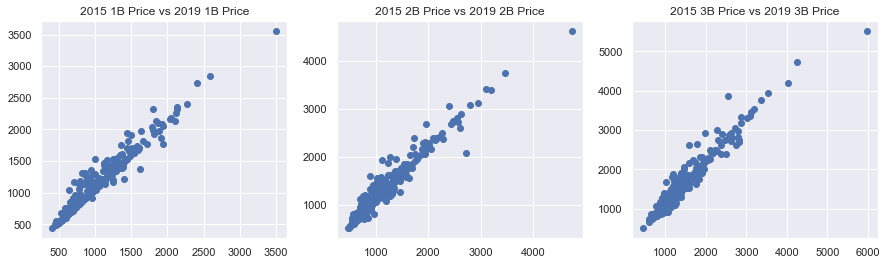

In [173]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
ax1.scatter(merge_1b['1B_Price_2015'], merge_1b['1B_Price_2019'])
ax1.set_title('2015 1B Price vs 2019 1B Price')

ax2.scatter(merge_2b['2B_Price_2015'], merge_2b['2B_Price_2019'])
ax2.set_title('2015 2B Price vs 2019 2B Price')

ax3.scatter(merge_3b['3B_Price_2015'], merge_3b['3B_Price_2019'])
ax3.set_title('2015 3B Price vs 2019 3B Price')

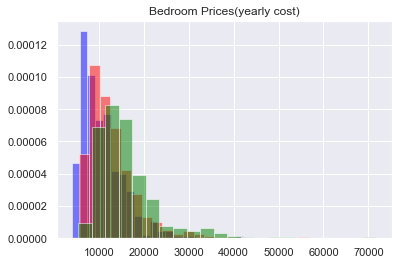

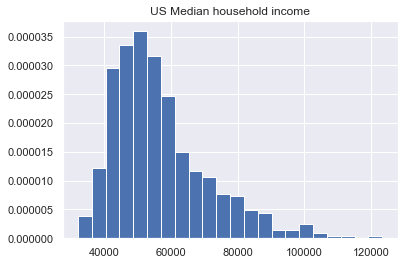

In [347]:
price_bins = int(np.sqrt(len(df_all['1B_Price'])))

one_bedroom = df_all['1B_Price'].hist(alpha=0.5, color='blue', density=True, bins=price_bins)
two_bedroom = df_all['2B_Price'].hist(alpha=0.5, color='red', density=True, bins=price_bins)
three_bedroom = df_all['3B_Price'].hist(alpha=0.5, color='green', density=True, bins=price_bins)
plt.title("Bedroom Prices(yearly cost)")
plt.show()


inc_bins = int(np.sqrt(len(df_all['Median_household_income'])))
df_all['Median_household_income'].hist(density=True,bins=inc_bins)
plt.title('US Median household income')
plt.show()


In [275]:
#Checking for normal distribution...
#Null hypothesis: The data is normally distributed
#Alternate hypothesis: The data is not normally distributed
chi_1b, p_1b = scipy.stats.chisquare(df_all['1B_Price'])
chi_2b, p_2b = scipy.stats.chisquare(df_all['2B_Price'])
chi_3b, p_3b = scipy.stats.chisquare(df_all['3B_Price'])
chi_income, p_income = scipy.stats.chisquare(df_all['Median_household_income'])
chi_pop, p_pop = scipy.stats.chisquare(df_all['Population'])

print(p_1b, p_2b, p_3b, p_income, p_pop) #We fail to reject the null hypothesis, thus the data is not normally distributed


0.0 0.0 0.0 0.0 0.0


1078658.9860544032

In [338]:
#sm.qqplot(df_all['1B_Price'])
log_1b = np.log(df_all['1B_Price'])
log_inc = np.log(df_all['Median_household_income'])
#sm.qqplot(log_1b)
chi_log1b, p_log_1b = scipy.stats.chisquare(log_1b)
p_log_1b

#When converted into log, the data becomes normally distributed.

1.0

In [195]:
from scipy.stats import norm
from scipy.stats import t, ttest_ind_from_stats

critical_1b = t.ppf(.95, df=len(df_all['1B_Price']))
critical_2b = t.ppf(.95, df=len(df_all['2B_Price']))
critical_3b = t.ppf(.95, df=len(df_all['3B_Price']))

margin_of_error_1b = critical_1b * np.std(df_all['1B_Price']) / np.sqrt(len(df_all['1B_Price']))
margin_of_error_2b = critical_2b * np.std(df_all['2B_Price']) / np.sqrt(len(df_all['2B_Price']))
margin_of_error_3b = critical_3b * np.std(df_all['3B_Price']) / np.sqrt(len(df_all['3B_Price']))

print(np.mean(df_all['1B_Price']), np.mean(df_all['1B_Price']) + margin_of_error_1b)
print(np.mean(df_all['2B_Price']), np.mean(df_all['2B_Price']) + margin_of_error_2b)
print(np.mean(df_all['3B_Price']), np.mean(df_all['3B_Price']) + margin_of_error_3b)


10621.55360426306 10977.179674241377
13003.491448397432 13435.775814998819
16147.043235591673 16660.187192648584


Text(0, 0.5, 'US Dollars')

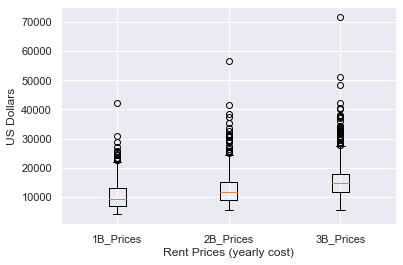

In [177]:
plt.boxplot(df_all['1B_Price'].dropna(), positions=[1])
plt.boxplot(df_all['2B_Price'].dropna(), positions=[2])
plt.boxplot(df_all['3B_Price'].dropna(), positions=[3])
plt.xticks([1,2,3], ['1B_Prices', '2B_Prices', '3B_Prices'])
plt.xlabel('Rent Prices (yearly cost)')
plt.ylabel('US Dollars')

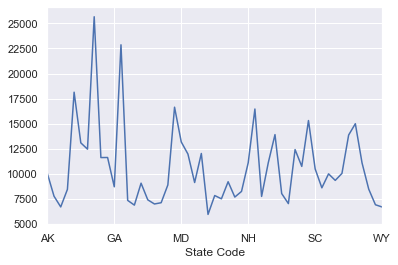

In [207]:
#df_all[['1B_Price','State Code']].groupby('State
#df_all['1B_State_Mean'] = 
#df_all.groupby('State Code')
#df_all.groupby('State Code')['1B_Price'].mean().

Text(0.5, 1.0, '2015 3B Price vs 2019 3B Price')

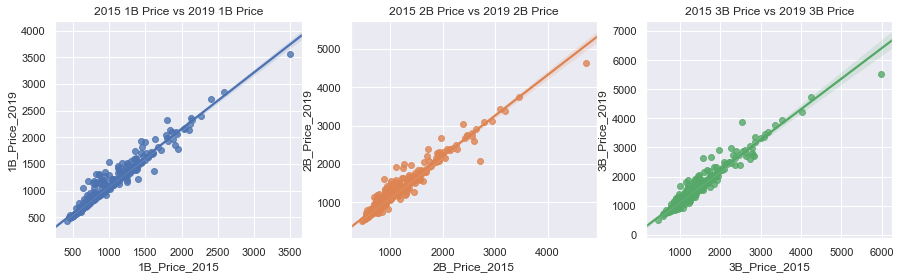

In [179]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
#ax1.scatter(merge_1b['1B_Price_2015'], merge_1b['1B_Price_2019'])
sns.regplot(merge_1b['1B_Price_2015'], merge_1b['1B_Price_2019'], ax=ax1)
ax1.set_title('2015 1B Price vs 2019 1B Price')

sns.regplot(merge_2b['2B_Price_2015'], merge_2b['2B_Price_2019'], ax=ax2)
ax2.set_title('2015 2B Price vs 2019 2B Price')

sns.regplot(merge_3b['3B_Price_2015'], merge_3b['3B_Price_2019'], ax=ax3)
ax3.set_title('2015 3B Price vs 2019 3B Price')


Text(0.5, 1.0, '2B Price vs 3B Price')

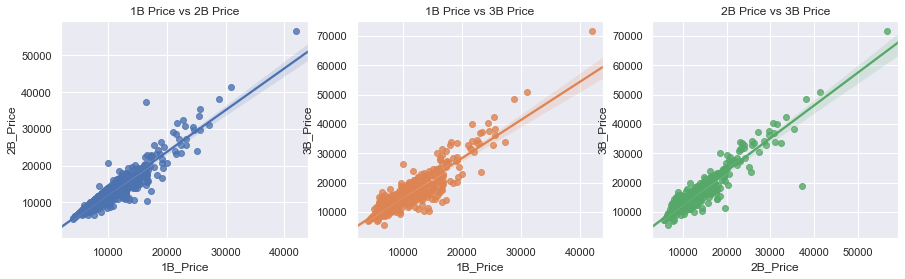

In [180]:
#sns.regplot('1B_Price','2B_Price', data=df_all, fit_reg = True)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
#ax1.scatter(merge_1b['1B_Price_2015'], merge_1b['1B_Price_2019'])
sns.regplot(df_all['1B_Price'], df_all['2B_Price'], ax=ax1)
ax1.set_title('1B Price vs 2B Price')

sns.regplot(df_all['1B_Price'], df_all['3B_Price'], ax=ax2)
ax2.set_title('1B Price vs 3B Price')

sns.regplot(df_all['2B_Price'], df_all['3B_Price'], ax=ax3)
ax3.set_title('2B Price vs 3B Price')

In [340]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')
reg = LinearRegression()
y = df_all[['1B_Price','2B_Price','3B_Price']]
X = df_all[['Median_household_income', 'Population']]
#X = df_all.drop(['1B_Price', '2B_Price', '3B_Price','County-State', 'County','State Code',
#                 'State','1B_Income-Price_Difference', '2B_Income-Price_Difference', '3B_Income-Price_Difference'], axis=1)
#y = y.reshape(-1,1)
#X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)
reg.fit(X_train, y_train)
print('R^2 score: ' + str(reg.score(X_test, y_test)))

cv_scores = cross_val_score(reg, X, y, cv=10)
print('Cross validation score: ' + str(np.mean(cv_scores)))

R^2 score: 0.36120480480046346
Cross validation score: 0.20903470824290005


In [329]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

cv_scores_2 = cross_val_score(model, X, y, cv=10)
print('Cross validation score: ' + str(np.mean(cv_scores_2)))

0.4288166035698879
Cross validation score: -0.010753240200893516


In [342]:
from sklearn.metrics import accuracy_score
X_bed = df_all['1B_Price'].values
y_inc = df_all['Median_household_income'].values

y_inc = y_inc.reshape(-1,1)
X_bed = X_bed.reshape(-1,1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_bed, y_inc, test_size=0.3, random_state= 42)

regr = LinearRegression()
regr.fit(X_train_2, y_train_2)
print(regr.score(X_test_2, y_test_2))
#type()

0.3550632062785056
